In [1]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Data

For this lab, we'll be using the American National Election Studies (ANES) data from the 2016 election. The codebook is available here: http://www.electionstudies.org/studypages/anes_pilot_2016/anes_pilot_2016_CodebookUserGuide.pdf

In [2]:
anes = pd.read_csv('../data/anes/anes_pilot_2016.csv')
anes

,version,caseid,weight,weight_spss,follow,turnout12,turnout12b,vote12,percent16,meet,...,flag_asianam10,flag_nativeam10,flag_other10,starttime,endtime,optintimestamp,count,ua,browser,os
0,ANES 2016 Pilot Study version 20160223,1,0.951160,0.542161,1,1,9,2,100,1,...,0,0,0,1/22/2016,1/22/2016,,173,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:43.0) G...,Firefox 43,Windows 7
1,ANES 2016 Pilot Study version 20160223,2,2.670196,1.522012,2,2,9,9,50,4,...,0,0,0,1/22/2016,1/22/2016,,87,Mozilla/5.0 (Linux; Android 6.0; LGLS991 Build...,Chrome 47,Android Linux 6.0
2,ANES 2016 Pilot Study version 20160223,3,1.430390,0.815322,1,1,9,1,100,1,...,0,0,0,1/22/2016,1/22/2016,,86,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,Safari 9,Mac OS X 10.9
3,ANES 2016 Pilot Study version 20160223,4,0.913966,0.520961,1,1,9,2,100,5,...,0,0,0,1/22/2016,1/22/2016,,211,Mozilla/5.0 (Android 5.1.1; Mobile; rv:43.0) G...,Firefox 43,Android 5.1
4,ANES 2016 Pilot Study version 20160223,5,0.263935,0.150443,1,1,9,1,100,2,...,0,0,0,1/23/2016,1/23/2016,,342,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Safari 9,iPhone iOS 9.2
5,ANES 2016 Pilot Study version 20160223,6,1.463118,0.833977,1,1,9,3,100,3,...,0,0,0,1/22/2016,1/22/2016,,72,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,Chrome 47,Mac OS X 10.11
6,ANES 2016 Pilot Study version 20160223,7,0.297196,0.169402,1,1,9,3,100,1,...,0,0,0,1/23/2016,1/23/2016,,169,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,Chrome 47,Windows 10
7,ANES 2016 Pilot Study version 20160223,8,0.318027,0.181275,1,1,9,1,100,5,...,0,0,0,1/23/2016,1/23/2016,,102,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,MSIE 11,Windows 7
8,ANES 2016 Pilot Study version 20160223,9,1.019467,0.581096,1,1,9,1,100,3,...,0,0,0,1/22/2016,1/22/2016,,105,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,MSIE 11,Windows 10
9,ANES 2016 Pilot Study version 20160223,10,0.944400,0.538308,1,1,9,2,100,1,...,1,1,1,1/22/2016,1/22/2016,,16,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,Chrome 45,Mac OS X 10.6


## Exploratory Data Analysis

Write code that plots a histogram of the "Feeling Thermometer - Barack Obama" variable. What is the shape of the plot? Report the 25th, 50th, and 75th percentiles. Keep in mind that valid answers have domain [0,100].

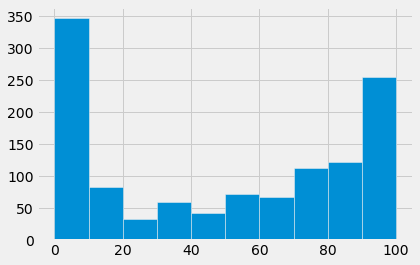

In [15]:
anes[anes["ftobama"] < 101].loc[:, "ftobama"].hist()

In [19]:
obama = anes[anes["ftobama"] < 101].loc[:, "ftobama"]
percentile(25, obama)

5

In [20]:
percentile(50, obama)

52

In [21]:
percentile(75, obama)

87

### Question 1

Now do the same for "Feeling Thermometer - Donald Trump." How do the two distributions compare?

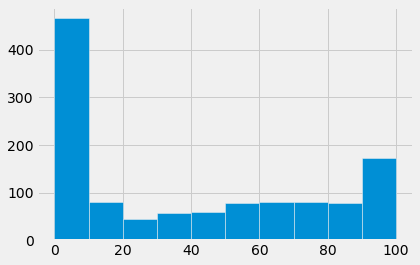

In [22]:
anes[anes["fttrump"] < 101].loc[:, "fttrump"].hist()

In [23]:
trump = anes[anes["fttrump"] < 101].loc[:, "fttrump"]
percentile(25, trump)

2

In [24]:
percentile(50, trump)

30

In [25]:
percentile(75, trump)

72

## Bootstrap

Write code that resamples the "ftobama" distribution, then plot a histogram. Be sure resample the number of rows that exist in the dataset, with replacement.

In [30]:
obama.size

1198

In [38]:
resample = obama.sample(n=1198, replace=True)

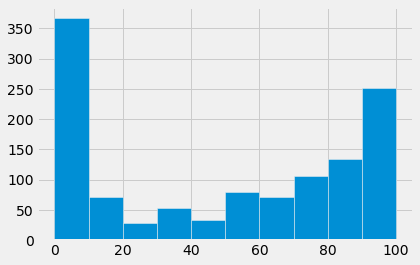

In [39]:
resample.hist()

In [40]:
percentile(50, resample)

53

### Question 2

How does the resampled median compare to the original median? Does this result make sense?

Now, define a function titled "bootstrap_median" that takes the original sample, the column name we're concerned with, and the number of resamples as arguments. The function shold calculate medians and return them in an array.

In [80]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.loc[:, label]
    medians = []
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample(n=just_one_column.size, replace=True)
        resampled_median = percentile(50, bootstrap_sample)
        medians.append(resampled_median)

    return medians

Replicate the bootstrap 10,000 times, then plot the results.

In [81]:
medians = bootstrap_median(anes, 'ftobama', 10000)

Plot a histogram of the resampled medians, and plot the 95% confidence interval.

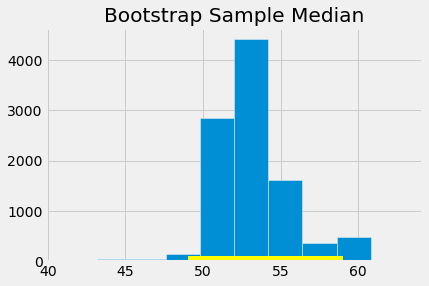

In [82]:
resampled_medians = pd.DataFrame(data={'Bootstrap Sample Median': medians})
resampled_medians.hist()
plots.plot(make_array(percentile(2.5, medians), percentile(97.5, medians)), make_array(0, 0), color='yellow', lw=10, zorder=1)

### Question 3

What can you infer about the likely population median given the above distribution?

Finally, write a simulation that constructs 100 confidence intervals. 

In [87]:
left_ends = []
right_ends = []

for i in np.arange(100):
    first_sample = obama.sample(n=500, replace=True)
    medians = bootstrap_median(first_sample, 'ftobama', 5000)
    left_ends.append(percentile(2.5, medians))
    right_ends.append(percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)
intervals = pd.DataFrame(data={"Left": left_ends, "Right": right_ends})

IndexingError: Too many indexers

#### Question 4

Finally, plot 100 confidence intervals (stacked on top of each other). What can you conclude about the median?

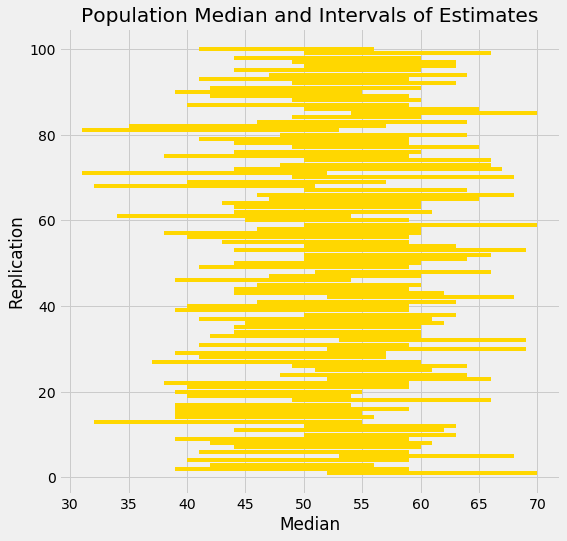

In [22]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.xlabel('Median')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');